# Machine Learning Assignment: Customer Segmentation & Purchase Prediction
**Name: Haneesh Singhal**<br>
**Student Code: bitsom_ba_25071841**<br>
**Date:04-Feb-2026**

In [ ]:
%pip install pandas numpy matplotlib seaborn skilearn

## Part 1: Data Exploration and Preprocessing

### 1.1 Load and Inspect

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_original = pd.read_csv('customer_data.csv')
df = df_original.copy()

In [ ]:
# Display the first 10 rows
df_original.head(10)

,customer_id,age,gender,city_tier,membership_type,total_spend,num_transactions,avg_transaction_value,days_since_last_purchase,num_visits,product_categories_purchased,discount_used,high_value_customer
0,CUST000878,29.0,Female,Tier 3,Silver,465.00,11,42.27,50.0,18.0,4,15.53,0
1,CUST004886,47.0,Male,Tier 1,Platinum,4451.32,23,193.54,16.0,38.0,6,404.45,1
2,CUST002485,37.0,Male,Tier 1,Platinum,1903.02,21,90.62,29.0,28.0,5,207.83,0
3,CUST002289,37.0,Male,Tier 1,Platinum,3952.75,23,171.86,33.0,31.0,11,502.30,1
4,CUST000812,25.0,Male,Tier 1,Silver,1367.07,11,124.28,46.0,18.0,7,70.93,0
5,CUST000249,36.0,Female,Tier 2,Silver,160.15,6,26.69,39.0,8.0,3,8.96,0
6,CUST003299,32.0,Male,Tier 2,Gold,3440.79,17,202.40,29.0,29.0,6,304.40,1
7,CUST000107,37.0,Female,Tier 1,Silver,505.17,6,84.20,51.0,15.0,4,16.93,0
8,CUST000280,26.0,Female,Tier 3,Silver,2476.96,9,275.22,44.0,10.0,4,71.01,0
9,CUST001282,27.0,NaN,Tier 1,Silver,404.24,12,33.69,56.0,17.0,8,26.07,0


In [ ]:
# Check the shape of the dataset
print("Shape of dataset:", df_original.shape)

Shape of dataset: (5025, 13)


In [ ]:
# Display data types and check for null values
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   5025 non-null   object 
 1   age                           4723 non-null   float64
 2   gender                        4724 non-null   object 
 3   city_tier                     5025 non-null   object 
 4   membership_type               5025 non-null   object 
 5   total_spend                   5025 non-null   float64
 6   num_transactions              5025 non-null   int64  
 7   avg_transaction_value         5025 non-null   float64
 8   days_since_last_purchase      4723 non-null   float64
 9   num_visits                    4724 non-null   float64
 10  product_categories_purchased  5025 non-null   int64  
 11  discount_used                 5025 non-null   float64
 12  high_value_customer           5025 non-null   int64  
dtypes: 

In [ ]:
# Generate summary statistics
df_original.describe(include='all')

,customer_id,age,gender,city_tier,membership_type,total_spend,num_transactions,avg_transaction_value,days_since_last_purchase,num_visits,product_categories_purchased,discount_used,high_value_customer
count,5025,4723.000000,4724,5025,5025,5025.000000,5025.000000,5025.000000,4723.000000,4724.000000,5025.000000,5025.000000,5025.000000
unique,5000,NaN,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CUST002734,NaN,Female,Tier 1,Silver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,2351,2321,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.279483,NaN,NaN,NaN,3520.270324,15.047761,219.407385,29.456490,23.032599,6.714030,308.958681,0.373731
std,NaN,11.608329,NaN,NaN,NaN,3503.705187,7.628706,167.171094,13.163085,10.362527,3.162972,373.824281,0.483842
min,NaN,18.000000,NaN,NaN,NaN,11.590000,1.000000,1.770000,4.000000,3.000000,1.000000,0.430000,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,1031.970000,9.000000,99.830000,19.000000,15.000000,4.000000,61.530000,0.000000
50%,NaN,38.000000,NaN,NaN,NaN,2258.380000,14.000000,176.020000,26.000000,21.000000,6.000000,166.820000,0.000000
75%,NaN,47.000000,NaN,NaN,NaN,4777.600000,20.000000,291.620000,41.000000,30.000000,9.000000,405.600000,1.000000


### 1.2 Handle Missing Values

In [ ]:
# Replace empty strings with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

# Identify columns with missing values
missing = df.isnull().sum()
print("Columns with missing values:\n", missing[missing > 0])

Columns with missing values:
 age                         302
gender                      301
days_since_last_purchase    302
num_visits                  301
dtype: int64


In [ ]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Fill numerical columns with median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode(dropna=True)[0])


# Verify no missing values remain
print("\n Missing values after imputation:\n\n", df.isnull().sum())


 Missing values after imputation:

 customer_id                     0
age                             0
gender                          0
city_tier                       0
membership_type                 0
total_spend                     0
num_transactions                0
avg_transaction_value           0
days_since_last_purchase        0
num_visits                      0
product_categories_purchased    0
discount_used                   0
high_value_customer             0
dtype: int64


### 1.3 Handle Duplicates

In [ ]:
# Number of rows before deduplication removal
rows_before = df_original.shape[0]

# Check for duplicates
duplicate_count = df_original.duplicated(subset=['customer_id']).sum()
print("Number of duplicate rows found: ", duplicate_count)

# Remove duplicates
df = df.drop_duplicates(subset=['customer_id'])
rows_after = df.shape[0]

print("Number of rows before removing duplicates:", rows_before)
print("Number of rows after removing duplicates:", rows_after)
print("Shape of dataset after deduplication:", df.shape)
print("Number of duplicates removed:", rows_before - rows_after)

Number of duplicate rows found:  25
Number of rows before removing duplicates: 5025
Number of rows after removing duplicates: 5000
Shape of dataset after deduplication: (5000, 13)
Number of duplicates removed: 25


### 1.4 Basic Exploratory Analysis

In [ ]:
# Distribution counts
gender_count = df['gender'].value_counts()
membership_type_count = df['membership_type'].value_counts()
high_value_customer_count = df['high_value_customer'].value_counts()

print("Gender distribution:\n", gender_count)
print("\nMembership type distribution:\n", membership_type_count)
print("\nHigh value customer distribution:\n", high_value_customer_count)

Gender distribution:
 gender
Female    2639
Male      2292
Other       69
Name: count, dtype: int64

Membership type distribution:
 membership_type
Silver      1959
Gold        1911
Platinum    1130
Name: count, dtype: int64

High value customer distribution:
 high_value_customer
0    3129
1    1871
Name: count, dtype: int64


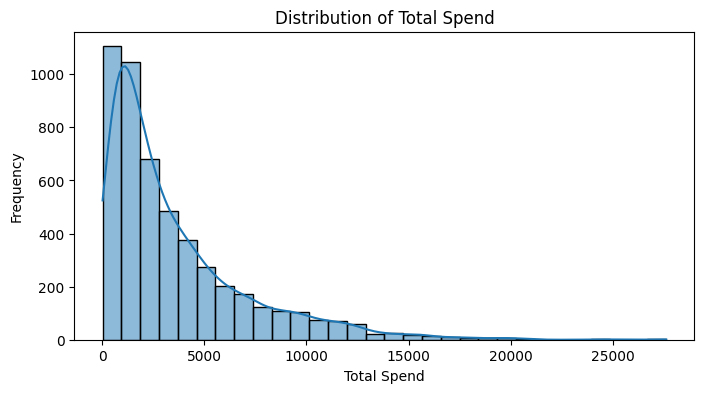

In [ ]:
# Histogram: Distribution of total_spend
plt.show(block=True)
plt.figure(figsize=(8,4))
sns.histplot(df['total_spend'], bins=30, kde=True)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

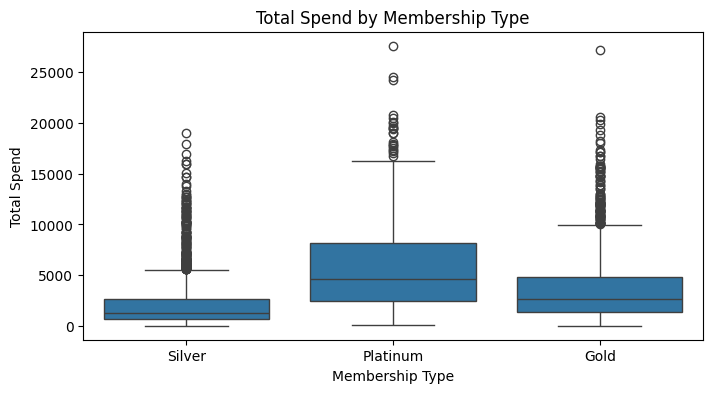

In [ ]:
# Box plot: Total spend by membership_type
plt.figure(figsize=(8,4))
sns.boxplot(x='membership_type', y='total_spend', data=df)
plt.title('Total Spend by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Total Spend')
plt.show()

**Observations:**
1. The majority of customers are in the Silver and Gold membership tiers, with Platinum being less common.
2. The distribution of total spend is right-skewed, indicating a small number of customers spend significantly more than the rest.
3. Platinum members tend to have higher total spend, but there are outliers in all membership types.

## Part 2: Customer Segmentation using Clustering

### 2.1 Prepare Data for Clustering

In [ ]:
# 2.1 Prepare Data for Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select numerical features for clustering
cluster_features = ['age', 'total_spend', 'num_transactions', 'avg_transaction_value',
                    'days_since_last_purchase', 'num_visits']
X_cluster = df[cluster_features]

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_cluster)

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

**Why scaling is necessary:**  
Scaling ensures that all features contribute equally to the clustering process. Without scaling, features with larger ranges (like total_spend) would dominate the distance calculations, biasing the clusters.

### 2.2 Determine Optimal K

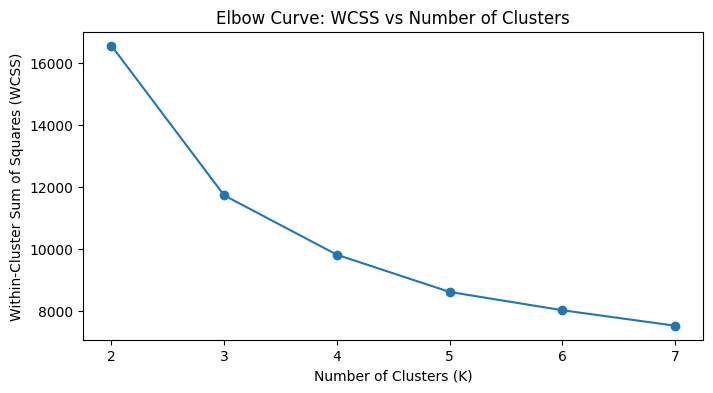

In [ ]:
from sklearn.cluster import KMeans

wcss = [] # Within-Cluster Sum of Squares
K_range = range(2, 8) # K values from 2 to 8
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Curve: WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_range)
plt.show()

**Chosen K value:**  
Based on the elbow curve, K = 4 is selected as the optimal number of clusters. At K = 4, the reduction in WCSS begins to slow down significantly, indicating diminishing returns from increasing the number of clusters further. This suggests that four clusters provide a good balance between compactness and model simplicity.

### 2.3 Apply K-means and Profile Segments

In [ ]:

optimal_k = 4 

# K-means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

df['customer_segment'] = kmeans.fit_predict(X_scaled)

# Count of customers in each cluster
print("Customers per segment:\n", df['customer_segment'].value_counts())

# Mean values of key features for each cluster
segment_profile = df.groupby('customer_segment')[cluster_features].mean()

display(segment_profile)

Customers per segment:
 customer_segment
0    1947
1    1742
2     816
3     495
Name: count, dtype: int64


,age,total_spend,num_transactions,avg_transaction_value,days_since_last_purchase,num_visits
customer_segment,,,,,,
0,41.487930,2829.547149,14.852594,202.212537,24.506934,22.626091
1,28.504018,997.751871,7.960964,145.085121,43.936280,13.541332
2,50.495098,5814.068358,26.519608,221.914522,16.615196,37.772059
3,49.254545,11336.849354,21.707071,545.660606,17.082828,32.375758


**Customer Segment Profiles:**<BR>
- **Customer Segment 0 – Established Moderate Spenders (stable, growth potential)**: Customers in this segment are middle‑aged (average ~41 years) with moderate total spend and transaction frequency. They visit reasonably often and have steady purchase behavior, but their spending and engagement are lower than the top segments. This group represents consistent customers with potential for gradual upselling.
- **Customer Segment 1 – Young Low-Engagement Customers (lowest value, re‑engagement focus)**: This segment consists of younger customers (average ~28 years) with the lowest total spend, fewest transactions, and infrequent visits. They also show the longest time since last purchase, indicating lower engagement. These customers are likely new, price‑sensitive, or disengaged and may require onboarding or re‑engagement campaigns.
- **Customer Segment 2 – High-Frequency Loyal Customers (loyal, frequency‑driven)**: Customers in this segment are older (average ~50 years) with high transaction frequency and frequent visits. They spend actively across many purchases and have relatively short gaps between transactions, indicating strong engagement. This group represents loyal customers who respond well to retention and loyalty programs.
- **Customer Segment 3 – Premium High-Value Customers (premium, revenue‑critical)**: This segment comprises high‑value customers with the highest total spend and exceptionally high average transaction value. They purchase relatively frequently, visit often, and have short intervals between purchases, reflecting strong brand affinity. These are premium customers ideal for exclusive offers, personalized experiences, and priority retention strategies.


## Part 3: Predictive Modeling

### 3.1 Feature Engineering

In [ ]:
# Create two new features 
df['spend_per_visit'] = (df['total_spend'] / df['num_visits']).replace(0, np.nan)
df['discount_percentage'] = (df['discount_used'] / df['total_spend']).replace(0, np.nan)

**Why these features are useful:**  
- `spend_per_visit` captures how much a customer spends each time they visit, indicating engagement and conversion.
- `discount_percentage` shows how much of their spend is driven by discounts

### 3.2 Data Preparation

In [ ]:
# 3.2 Data Preparation for Modeling
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['customer_id', 'high_value_customer'], axis=1)
y = df['high_value_customer']

# One-Hot Encoding for categorical features
X = pd.get_dummies(X, columns=['gender', 'city_tier', 'membership_type'], drop_first=True)

# Identify numerical columns for scaling
num_features = ['age', 'total_spend', 'num_transactions', 'avg_transaction_value',
                'days_since_last_purchase', 'num_visits', 'product_categories_purchased',
                'discount_used', 'spend_per_visit', 'discount_percentage']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standard Scaling (fit only on train)
scaler = StandardScaler()

# Transform numerical features
X_train[num_features] = scaler.fit_transform(X_train[num_features])

# Transform test set
X_test[num_features] = scaler.transform(X_test[num_features])

### 3.3 Build Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ---------------------------
# Part 3.3: Define Model (Train + Predict)
# ---------------------------

# Option 1: Logistic Regression
log_reg = LogisticRegression(max_iter=500, solver="liblinear") # Increased max_iter for convergence
log_reg.fit(X_train, y_train)
lr_y_pred = log_reg.predict(X_test)

# Option 2: Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42) # Set random_state for reproducibility
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Option 3: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42) # Set random_state for reproducibility
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)


### 3.4 Model Evaluation

In [ ]:

def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")   
    rec = recall_score(y_test, y_pred, average="weighted")       
    f1 = f1_score(y_test, y_pred, average="weighted")            

    print(f"\n====== {model_name} ======")
    print("Confusion Matrix:\n", cm)
    print(f"\nAccuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))


# Evaluate each model (same common evaluation function)
evaluate_model(y_test, lr_y_pred, "Logistic Regression")
evaluate_model(y_test, dt_y_pred, "Decision Tree Classifier")
evaluate_model(y_test, rf_y_pred, "Random Forest Classifier")


====== Logistic Regression ======
Confusion Matrix:
 [[617   9]
 [ 21 353]]

Accuracy: 0.970
Precision: 0.970
Recall: 0.970
F1 Score: 0.970

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       626
           1       0.98      0.94      0.96       374

    accuracy                           0.97      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000


====== Decision Tree Classifier ======
Confusion Matrix:
 [[621   5]
 [  3 371]]

Accuracy: 0.992
Precision: 0.992
Recall: 0.992
F1 Score: 0.992

Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       626
           1       0.99      0.99      0.99       374

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       

**Model Choice:**  (**Random Forest Classifier**)<br>
Random Forest Classifier is chosen for its ability to handle both numerical and categorical features, robustness to outliers, and strong performance on tabular data. Since customer behavior prediction is complex and involves non-linear relationships, Random Forest captures these patterns better than Logistic Regression. Decision Trees can easily overfit, but Random Forest reduces overfitting by averaging many trees.

**Interpretation:**  
- For this business problem, **recall** is one of the most critical metrics because the company wants to correctly identify as many high-value customers as possible. Missing a high‑value customer (false negative) means losing potential revenue and missing targeted marketing opportunities.
- **Precision** also matters because targeting too many low‑value customers (false positives) wastes marketing budget. Therefore, the balance between **Recalls** and **Precision** is reflected in the **F1-score**, which is an important metric for evaluating the model's overall performance.
- **Prediction quality and stability**: The confusion matrix and near‑identical class‑wise metrics confirm that errors are very rare and evenly distributed. This suggests the Random Forest model is highly robust and suitable for deployment in real‑world decision‑making scenarios.

## Part 4: Optimization and Insights

### 4.1 Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for all models
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20]
        }
    }    
}

results = []

# Iterate through each model for baseline and grid search
for name, config in models.items():

    # -------- Baseline model --------
    base_model = config['model']
    base_model.fit(X_train, y_train) # Train baseline model
    y_pred_base = base_model.predict(X_test) # Predictions

    base_acc = accuracy_score(y_test, y_pred_base) # Baseline accuracy
    base_f1 = f1_score(y_test, y_pred_base) # Baseline F1 score

    # -------- Grid Search --------
    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=3, # 3-fold cross-validation
        scoring='f1',
        n_jobs=-1
    )

    # Fit grid search
    grid.fit(X_train, y_train)

    # Best model from grid search
    best_model = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")

    # Predictions with best model
    y_pred_best = best_model.predict(X_test) # Predictions
    tuned_acc = accuracy_score(y_test, y_pred_best) # Tuned accuracy
    tuned_f1 = f1_score(y_test, y_pred_best) # Tuned F1 score

    results.append({
        'Model': name,
        'Baseline Accuracy': base_acc,
        'Tuned Accuracy': tuned_acc,
        'Baseline F1 Score': base_f1,
        'Tuned F1 Score': tuned_f1
    })

# Display results
performance_df = pd.DataFrame(results).round(6)
performance_df



Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}


,Model,Baseline Accuracy,Tuned Accuracy,Baseline F1 Score,Tuned F1 Score
0,Logistic Regression,0.970,0.973,0.959239,0.963464
1,Decision Tree,0.992,0.993,0.989333,0.990679
2,Random Forest,0.993,0.993,0.990654,0.990654


### 4.2 Feature Importance

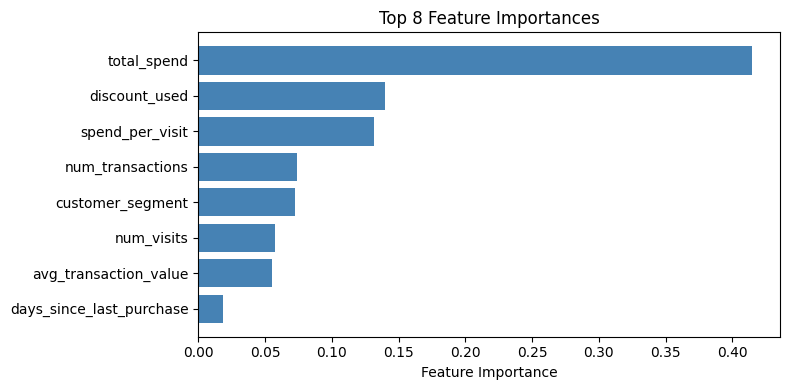

,Feature,Importance
1,total_spend,0.414936
7,discount_used,0.139516
9,spend_per_visit,0.131318
2,num_transactions,0.073953
8,customer_segment,0.072517
5,num_visits,0.057787
3,avg_transaction_value,0.055315
4,days_since_last_purchase,0.018691


In [ ]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,          # list of feature column names
    'Importance': grid.best_estimator_.feature_importances_ # feature importance from the best model
})

# Select top 8 features
top_features = feature_importance.sort_values(
    by='Importance', ascending=False # sort by importance descending
).head(8)

# Plot top 8 feature importances
plt.figure(figsize=(8,4))
plt.barh(
    top_features['Feature'],  # y-axis: feature names
    top_features['Importance'], # x-axis: importance values
    color='steelblue'
)
plt.title('Top 8 Feature Importances')
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis() # highest importance on top
plt.tight_layout()
plt.show()

top_features = top_features.round(6)
top_features

**Feature Importance Interpretation:**  
- Features like `total_spend` is the most influential feature, showing that overall monetary contribution is the strongest driver of business outcomes.
- `Discount usage`, `spend per visit` and `number of transactions` highlight the importance of purchasing intensity and customer responsiveness to promotions.
- The relatively low importance of `days since last purchase` indicates that long‑term spending behavior matters more than short‑term recency alone.

### 4.3 Business Recommendations

1. **1. Recommendation from Clustering Insights:**  
   - The clustering analysis segmented customers into distinct groups with clearly different spending behaviors, notably separating high‑value customers (`high total_spend` and `spend_per_visit`) from low‑value, infrequent buyers. These differences indicate that customer value is not uniform and requires differentiated engagement strategies. High‑value clusters should be targeted with retention‑focused initiatives such as loyalty benefits and personalized offers, while low‑value clusters should receive cost‑efficient activation campaigns. This targeted approach ensures marketing investments are aligned with the economic value identified through clustering.

2. **2. Recommendation from Model Predictions:**  
   - The predictive model identifies customers at risk of unfavorable outcomes (e.g., low future spending) even when they still show moderate engagement levels, such as ongoing visits or past transactions. This indicates an opportunity for early intervention before customer value declines. Customers flagged by the model should be prioritized for personalized re‑engagement actions, including tailored offers or product recommendations. Leveraging model predictions in this way enables proactive decision‑making rather than reactive retention efforts.

3. **3. Recommendation from Feature Importance:**  
   - Feature importance results show that `total_spend (0.4149)` is the strongest predictor, followed by `discount_used (0.1395)` and `spend_per_visit (0.1313)`, together accounting for nearly **69%** of total importance. In contrast, `days_since_last_purchase (0.0187)` has minimal influence, indicating that recency alone is not a key driver of outcomes. This suggests that business strategies should prioritize increasing customer value and optimizing discount usage rather than focusing heavily on inactivity‑based campaigns. Implementing spend‑based incentives and improving purchase efficiency per visit is therefore likely to yield higher impact.